In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

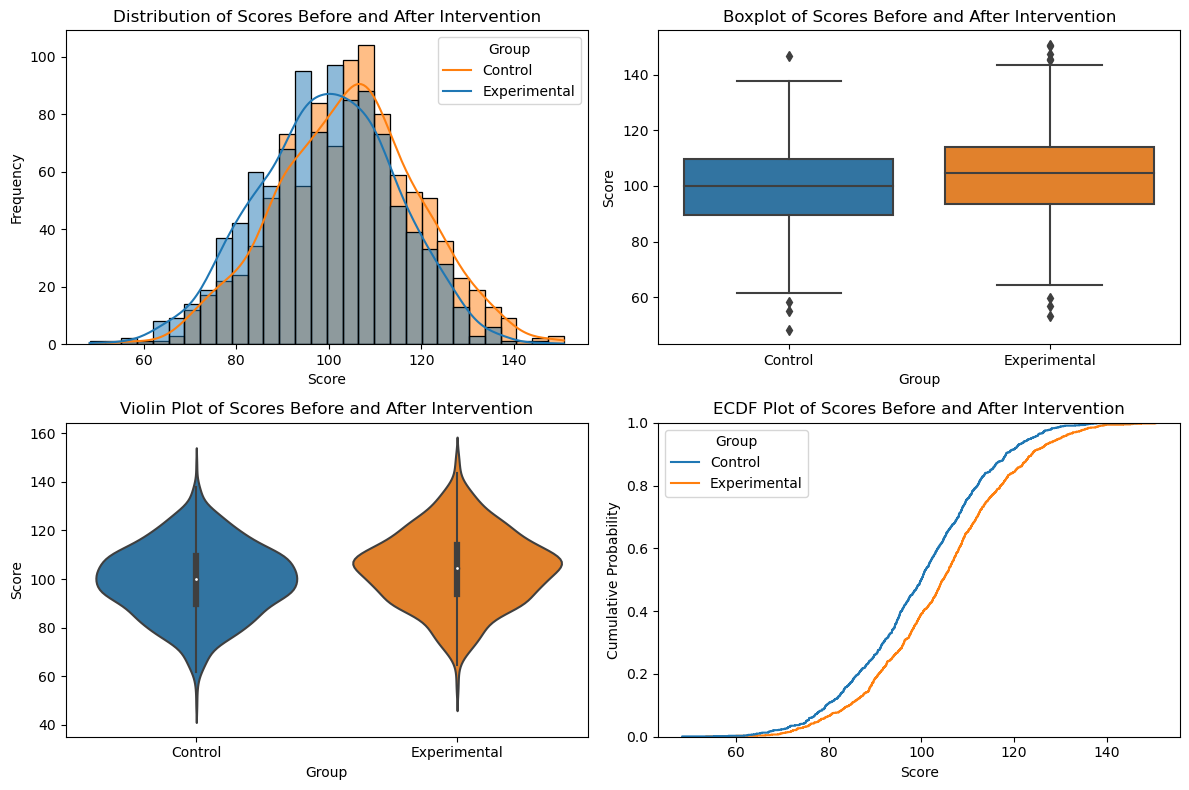

In [11]:
#Generating data for the control group (before the intervention)
control_data = np.random.normal(loc=100, scale=15, size=1000)

# Generating data for the experimental group (after the intervention)
# Assuming a 5% increase in the mean
experimental_data = np.random.normal(loc=105, scale=15, size=1000)

# Creating DataFrames for the control and experimental groups
control_group = pd.DataFrame({'Group': 'Control', 'Score': control_data})
experimental_group = pd.DataFrame({'Group': 'Experimental', 'Score': experimental_data})

# Combining control and experimental data
combined_data = pd.concat([control_group, experimental_group])

# Ploting distributions of control and experimental groups
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.histplot(data=combined_data, x='Score', hue='Group', kde=True, bins=30)
plt.title('Distribution of Scores Before and After Intervention')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend(title='Group', labels=['Control', 'Experimental'])

plt.subplot(2, 2, 2)
sns.boxplot(data=combined_data, x='Group', y='Score')
plt.title('Boxplot of Scores Before and After Intervention')
plt.xlabel('Group')
plt.ylabel('Score')

plt.subplot(2, 2, 3)
sns.violinplot(data=combined_data, x='Group', y='Score')
plt.title('Violin Plot of Scores Before and After Intervention')
plt.xlabel('Group')
plt.ylabel('Score')

plt.subplot(2, 2, 4)
sns.ecdfplot(data=combined_data, x='Score', hue='Group')
plt.title('ECDF Plot of Scores Before and After Intervention')
plt.xlabel('Score')
plt.ylabel('Cumulative Probability')

plt.tight_layout()
plt.show()

In [8]:
# Performing statistical analysis (two-sample t-test)
t_statistic, p_value = stats.ttest_ind(control_group['Score'], experimental_group['Score'])

# Interpreting results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. The intervention has a significant impact.")
else:
    print("Fail to reject the null hypothesis. There's no significant impact from the intervention.")

Reject the null hypothesis. The intervention has a significant impact.


In [4]:
# Calculating effect size (Cohen's d)
mean_diff = experimental_group['Score'].mean() - control_group['Score'].mean()
pooled_std = np.sqrt(((len(control_group) - 1) * control_group['Score'].var() + (len(experimental_group) - 1) * experimental_group['Score'].var()) / (len(control_group) + len(experimental_group) - 2))
effect_size = mean_diff / pooled_std

print("Effect Size (Cohen's d):", effect_size)

Effect Size (Cohen's d): 0.35311261329422505


In [5]:
# Calculating additional statistics
control_mean = control_group['Score'].mean()
experimental_mean = experimental_group['Score'].mean()
control_std = control_group['Score'].std()
experimental_std = experimental_group['Score'].std()

print("\nAdditional Statistics:")
print(f"Control Mean: {control_mean:.2f}")
print(f"Experimental Mean: {experimental_mean:.2f}")
print(f"Control Standard Deviation: {control_std:.2f}")
print(f"Experimental Standard Deviation: {experimental_std:.2f}")


Additional Statistics:
Control Mean: 100.70
Experimental Mean: 105.94
Control Standard Deviation: 14.83
Experimental Standard Deviation: 14.84
